# Predicting Reading Test Scores #

### Key Takeaways ###

- **We created a multiple regression model to predict students' scores on the reading section of the PISA exam for 2009. Our model contemplated both demographic and environmental variables.**


- **Our first model was conditioned on all variables with missing values removed. The model exhibited the following properties: $R^{2}$ (in-sample) =.325, RMSE (in-sample) = 73.37 versus a baseline RMSE (in-sample) 89.31. Out-of-sample statistics were as follows: $R^{2}$=0.2612, RMSE = 77.51 versus a baseline RMSE of 88.76. In our estimation, the model was superior to predicting reading test scores via the baseline model in all respects.**


- **In our "Beyond the Assignment" section, we created a second model by eliminating multicollinear predictors and replacing missing values with imputed data calculated using Multiple Imputation by Chained Equations (a/k/a "MICE"). We improved our in-sample $R^{2}$ by ~ $11.3\%$ and Adjusted-$R^{2}$ by ~ $12.5\%$. Out-of-Sample RMSE increased by a mere .02%, while out-of-sample $R^{2}$ declined by 11% due to feature elimination.**


- **Our final model, in which we expunged statistically insignificant variables retained in earlier models, displayed further improvement with a slightly lower out-of-sample RMSE relative to our second model, and virtually unchanged out-of-sample $R^{2}$.**

### Background Information ###

The Programme for International Student Assessment (PISA) is an exam administered every three years to 15-year-old students across the globe. The PISA is intended to evaluate student performance in the following subjects: mathematics, reading, and science. The test provides cross-cultural, quantitative metrics by which student performance in these disciplines can be compared.

(source: MITx)

### The Problem ###

Can we predict the reading scores of students from the United States of America on the 2009 PISA exam?

(source: MITx)

### The Data ###

The dataset is derived from 2009 PISA Public-Use Data Files distributed by the United States National Center for Education Statistics (NCES). It contains demographic information on American students(a/k/a "subjects" or "examinees") sitting for the exam, as well as data on their schools. Specifically, we concern ourselves with the following variables:

**grade**: Student grade level (i.e., K through 12)

**male**: The student's gender (1/0)

**raceeth**: The subject's race or ethnic draw

**preschool**: Did examinee attend preschool (1/0)

**expectBachelors**: Student plans with respect to obtaining a bachelor's degree (1/0)

**motherHS**: Maternal high school completion (1/0)

**motherBachelors**: Maternal four-year college/university completion (1/0)

**motherWork**: Does the student's mother work part- or full-time (1/0)

**fatherHS**: Paternal high school completion (1/0)

**fatherBachelors**: Paternal four-year college/university completion (1/0)

**fatherWork**: Does the student's father work part- or full-time (1/0)

**selfBornUS**: Student was born in the U.S. (1/0)

**motherBornUS**: Subject's mother was born in the U.S. (1/0)

**fatherBornUS**: Examinee's father was born in the U.S. (1/0)

**englishAtHome**: Student speaks English at home (1/0)

**computerForSchoolwork**: Student has access to a computer for schoolwork (1/0)

**read30MinsADay**: Student reads for pleasure 30 minutes/day (1/0)

**minutesPerWeekEnglish**: Minutes per week the student attends English class

**studentsInEnglish**: Total number of students in subject's English class

**schoolHasLibrary**: Does the student's school have a library (1/0)

**publicSchool**: Does the student attend a public school (1/0)

**urban**: Is the school located in an urban area (1/0)

**schoolSize**: Number of students enrolled in the examinee's school

**readingScore**: The student's reading score on the PISA, on a 1000-point scale

(source: MITx)

In [4]:
install.packages("corrplot")
install.packages("tidyverse")
install.packages("caTools")
install.packages("ROCR")
install.packages("data.table")
install.packages("wesanderson")
install.packages("mice")
suppressPackageStartupMessages(library(caTools))
suppressPackageStartupMessages(library(wesanderson))
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(corrplot))
suppressPackageStartupMessages(library(ROCR))
suppressPackageStartupMessages(library(data.table))
suppressPackageStartupMessages(library(mice))

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Warning message:
“package ‘gplots’ was built under R version 3.6.1”

In [5]:
train = read.csv("pisa2009train.csv")
test = read.csv("pisa2009test.csv")

### Data Structure ###

In [6]:
str(train)

'data.frame':	3663 obs. of  24 variables:
 $ grade                : int  11 11 9 10 10 10 10 10 9 10 ...
 $ male                 : int  1 1 1 0 1 1 0 0 0 1 ...
 $ raceeth              : Factor w/ 7 levels "American Indian/Alaska Native",..: NA 7 7 3 4 3 2 7 7 5 ...
 $ preschool            : int  NA 0 1 1 1 1 0 1 1 1 ...
 $ expectBachelors      : int  0 0 1 1 0 1 1 1 0 1 ...
 $ motherHS             : int  NA 1 1 0 1 NA 1 1 1 1 ...
 $ motherBachelors      : int  NA 1 1 0 0 NA 0 0 NA 1 ...
 $ motherWork           : int  1 1 1 1 1 1 1 0 1 1 ...
 $ fatherHS             : int  NA 1 1 1 1 1 NA 1 0 0 ...
 $ fatherBachelors      : int  NA 0 NA 0 0 0 NA 0 NA 0 ...
 $ fatherWork           : int  1 1 1 1 0 1 NA 1 1 1 ...
 $ selfBornUS           : int  1 1 1 1 1 1 0 1 1 1 ...
 $ motherBornUS         : int  0 1 1 1 1 1 1 1 1 1 ...
 $ fatherBornUS         : int  0 1 1 1 0 1 NA 1 1 1 ...
 $ englishAtHome        : int  0 1 1 1 1 1 1 1 1 1 ...
 $ computerForSchoolwork: int  1 1 1 1 1 1 1 1 1 1 ...
 $ re

### Data Summary ###

In [7]:
summary(train)

     grade            male                      raceeth       preschool     
 Min.   : 8.00   Min.   :0.0000   White             :2015   Min.   :0.0000  
 1st Qu.:10.00   1st Qu.:0.0000   Hispanic          : 834   1st Qu.:0.0000  
 Median :10.00   Median :1.0000   Black             : 444   Median :1.0000  
 Mean   :10.09   Mean   :0.5111   Asian             : 143   Mean   :0.7228  
 3rd Qu.:10.00   3rd Qu.:1.0000   More than one race: 124   3rd Qu.:1.0000  
 Max.   :12.00   Max.   :1.0000   (Other)           :  68   Max.   :1.0000  
                                  NA's              :  35   NA's   :56      
 expectBachelors     motherHS    motherBachelors    motherWork    
 Min.   :0.0000   Min.   :0.00   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:1.0000   1st Qu.:1.00   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :1.0000   Median :1.00   Median :0.0000   Median :1.0000  
 Mean   :0.7859   Mean   :0.88   Mean   :0.3481   Mean   :0.7345  
 3rd Qu.:1.0000   3rd Qu.:1.00   3rd Qu.:1.0000  

Our data summary reveals our dataset is far from complete. The columns below are missing values for one or more observations.

In [8]:
na_values = colnames(train)[apply(is.na(train), 2, any)]
na_values

[1] "raceeth"               "preschool"             "expectBachelors"      
 [4] "motherHS"              "motherBachelors"       "motherWork"           
 [7] "fatherHS"              "fatherBachelors"       "fatherWork"           
[10] "selfBornUS"            "motherBornUS"          "fatherBornUS"         
[13] "englishAtHome"         "computerForSchoolwork" "read30MinsADay"       
[16] "minutesPerWeekEnglish" "studentsInEnglish"     "schoolHasLibrary"     
[19] "schoolSize"

For the moment, we will remove incomplete observations. Later, in our "Beyond the Assignment" section, we use "Multiple Imputation by Chained Equations" (MICE) to examine how a more sophisticated approach to handling missing values influences our results.

In [9]:
train2 = na.omit(train)
test2 = na.omit(test)

In [10]:
na_values = colnames(train2)[apply(is.na(train2), 2, any)]
na_values

character(0)

Performance differences between the sexes are always a topic of conversation. The data below demonstrate that, in 2009, the average female student outperformed the average male student on the reading portion of the exam by approximately  23 points.

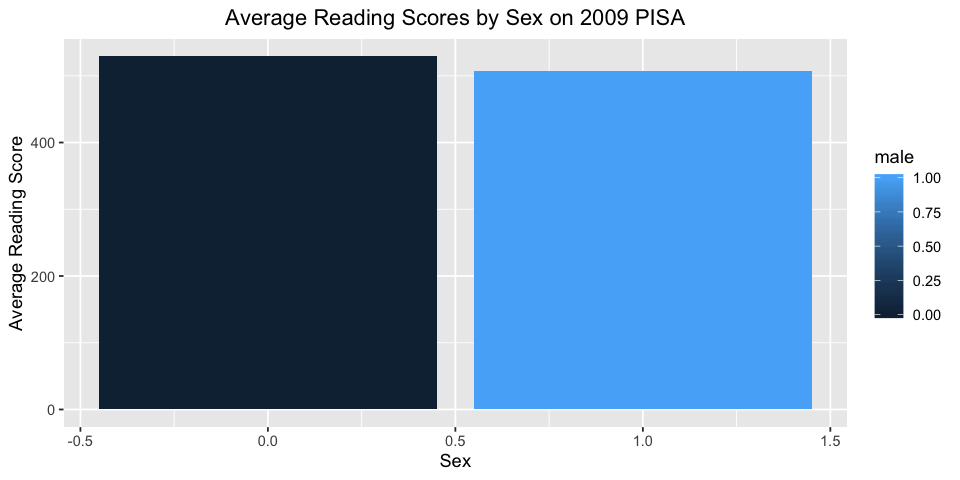

In [11]:
male_female_read = train2 %>%
    group_by(male) %>%
    summarise(Total = as.integer(round(mean(readingScore),0)))
options(repr.plot.width=8, repr.plot.height=4)
ggplot(male_female_read, aes(x = male, y = Total, fill=male)) +
    geom_bar(stat='identity') +
    ggtitle("Average Reading Scores by Sex on 2009 PISA") +
    theme(plot.title = element_text(hjust=.5)) +
    xlab("Sex") +
    ylab("Average Reading Score")

There is also a distinctive point spread among the top and bottom three racial/ethnic groups. Below we present the average reading test scores by race and ethnicity. Asians outperformed all other participants with an average score of 549.16, while American Indians/Alaskans exhibited the poorest performance with an average score of 443.08. This represents a range of 106.08. 

While it is beyond the scope of this study to pinpoint precisely why this disparity exists, we conjecture it is a confluence of multiple factors including, though not limited to, socio-economic status, access to high-quality primary and secondary education, and cultural variables such as parenting style. 

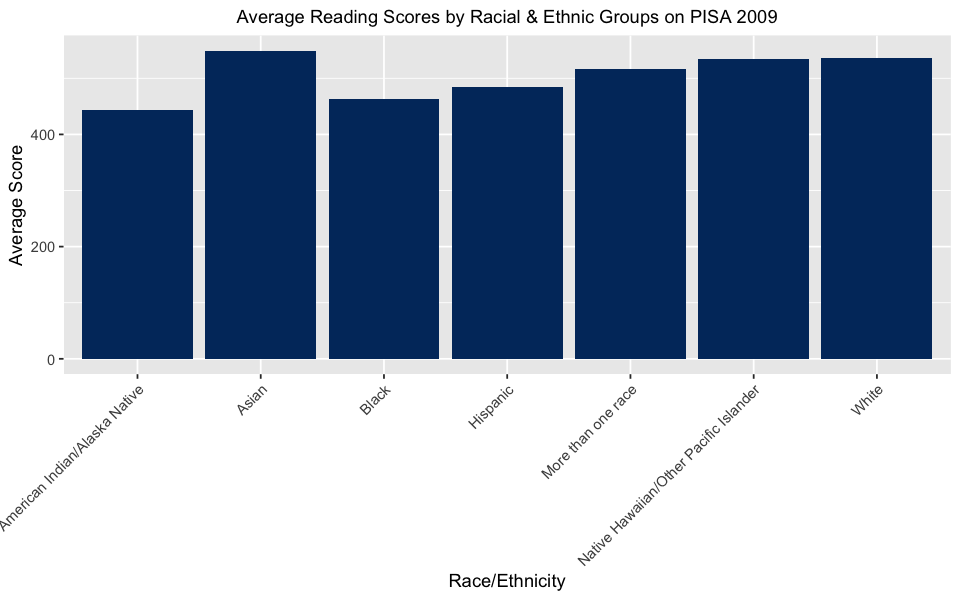

In [12]:
read_by_race = train2 %>%
    group_by(raceeth) %>%
    summarise(Total = as.integer(round(mean(readingScore),0)))
options(repr.plot.width=8, repr.plot.height=5)
ggplot(read_by_race, aes(x = raceeth, y = Total)) + 
    geom_bar(stat='identity', fill="#00356B") +
    ggtitle("Average Reading Scores by Racial & Ethnic Groups on PISA 2009") +
    theme(plot.title = element_text(size=11, hjust=.5)) +
    xlab("Race/Ethnicity") +
    theme(text = element_text(size=11), axis.text.x = element_text(angle=45, hjust=1)) +
    ylab("Average Score") + 
    theme(text=element_text(size=11))

### The Model ###

We are attempting to predict a continuous variable amenable to a linear model, so we will pursue a multiple regression strategy. We begin by setting the reference level for our **raceeth** factor variable to the most frequent observation.

In [13]:
train2$raceeth = relevel(train2$raceeth, "White")
test2$raceeth = relevel(test2$raceeth, "White")

Having set our reference level, let's see what a model containing all predictors yields. This may assist us in determining variable importance.

In [14]:
linReg1 = lm(readingScore ~ ., data=train2)

In [15]:
summary(linReg1)


Call:
lm(formula = readingScore ~ ., data = train2)

Residuals:
    Min      1Q  Median      3Q     Max 
-247.44  -48.86    1.86   49.77  217.18 

Coefficients:
                                                Estimate Std. Error t value
(Intercept)                                   143.766333  33.841226   4.248
grade                                          29.542707   2.937399  10.057
male                                          -14.521653   3.155926  -4.601
raceethAmerican Indian/Alaska Native          -67.277327  16.786935  -4.008
raceethAsian                                   -4.110325   9.220071  -0.446
raceethBlack                                  -67.012347   5.460883 -12.271
raceethHispanic                               -38.975486   5.177743  -7.528
raceethMore than one race                     -16.922522   8.496268  -1.992
raceethNative Hawaiian/Other Pacific Islander  -5.101601  17.005696  -0.300
preschool                                      -4.463670   3.486055  -1.280
ex

The $R^{2}$ is a low $0.3251$. This suggests the predictive problem under consideration is more complex than one would have initially thought. Curiously, not nearly as many variables in the model are as significant as we expected. Note, however, that sex (i.e., **male**) and race/ethnicity (i.e., **raceeth**) are statistically significant. 

In [16]:
linReg1_pred = predict(linReg1)

In [17]:
rmse = round(sqrt(mean((train2$readingScore - linReg1_pred)^2)),4)
rmse_baseline = round(sqrt(mean((train2$readingScore - mean(train2$readingScore))^2)),4)

cat(paste("The in-sample RMSE of our model is ", round(rmse,2), " versus a baseline RMSE of ", round(rmse_baseline,2),".", sep=""))

The in-sample RMSE of our model is 73.37 versus a baseline RMSE of 89.31.

The RMSE of our model compares favorably to that which would be produced by a baseline prediction using the mean value for our response variable, **readingScore**, in our dataset.

Before making adjustments to our model, we'll look at its out-of-sample performance.

In [18]:
linReg1_predTest = predict(linReg1, newdata=test2)

In [19]:
rmse_test = sqrt(mean(((test2$readingScore - linReg1_predTest)^2)))
rmse_baseline_test = round(sqrt(mean((test2$readingScore - mean(test2$readingScore))^2)),4)
cat(paste("The out-of-sample RMSE of our model is ", round(rmse_test,2), " versus an out-of-sample baseline RMSE of ", round(rmse_baseline_test,2),".", sep=""))

The out-of-sample RMSE of our model is 76.29 versus an out-of-sample baseline RMSE of 88.76.

The RMSE rises in out-of-sample testing, however, it's not uncommon for a model to perform slightly worse on unseen data than the data on which it was trained. That said, our model compares very favorably to the out-of-sample baseline RMSE.

In [20]:
sse = sum((test2$readingScore - linReg1_predTest)^2)
sst = sum((test2$readingScore - mean(test2$readingScore))^2)
r_square = (1-(sse/sst))
cat(paste('The out-of-sample R-Squared for our model is ', round(r_square, 4), ".", sep=""))

The out-of-sample R-Squared for our model is 0.2612.

As expected, we witnessed a performance degradation, as measured by $R^{2}$. This outcome was expected, given that 1) the removal of variables from any model will precipitate a decline in $R^{2}$ and 2) as mentioned above, performance metrics tend to go down in an out-of-sample testing context. Still, model performance on the test set was strong. But can we do better?!

### Beyond the Assignment: Can We Do Better? ###

We begin by changing how we cope with missing data. Recall that the model above was trained on a data set from which incomplete observations were removed. While this is a legitimate strategy for handling missing values, the obvious downside is that the model will be trained on only those observations that are 100% complete. This could introduce unnecessary bias into our model. 

Multiple Imputation by Chained Equations ("MICE") is a more nuanced approach to solving the problem of missing data. While the underlying math is complex, the idea behind MICE is simple: Existing predictor variables are used to forecast missing data. 

Below are the 19 predictors missing data.

In [21]:
na_predictors_train = colnames(train)[apply(is.na(train), 2, any)]
na_predictors_train

[1] "raceeth"               "preschool"             "expectBachelors"      
 [4] "motherHS"              "motherBachelors"       "motherWork"           
 [7] "fatherHS"              "fatherBachelors"       "fatherWork"           
[10] "selfBornUS"            "motherBornUS"          "fatherBornUS"         
[13] "englishAtHome"         "computerForSchoolwork" "read30MinsADay"       
[16] "minutesPerWeekEnglish" "studentsInEnglish"     "schoolHasLibrary"     
[19] "schoolSize"

The following code executes the MICE algorithm. The helper function below the MICE output inserts the imputed values into our data frame.

In [22]:
na_data_train = train[c(na_predictors_train)]
set.seed(1024)
imputed = complete(mice(na_data_train))


 iter imp variable
  1   1  raceeth  preschool  expectBachelors  motherHS  motherBachelors  motherWork  fatherHS  fatherBachelors  fatherWork  selfBornUS  motherBornUS  fatherBornUS  englishAtHome  computerForSchoolwork  read30MinsADay  minutesPerWeekEnglish  studentsInEnglish  schoolHasLibrary  schoolSize
  1   2  raceeth  preschool  expectBachelors  motherHS  motherBachelors  motherWork  fatherHS  fatherBachelors  fatherWork  selfBornUS  motherBornUS  fatherBornUS  englishAtHome  computerForSchoolwork  read30MinsADay  minutesPerWeekEnglish  studentsInEnglish  schoolHasLibrary  schoolSize
  1   3  raceeth  preschool  expectBachelors  motherHS  motherBachelors  motherWork  fatherHS  fatherBachelors  fatherWork  selfBornUS  motherBornUS  fatherBornUS  englishAtHome  computerForSchoolwork  read30MinsADay  minutesPerWeekEnglish  studentsInEnglish  schoolHasLibrary  schoolSize
  1   4  raceeth  preschool  expectBachelors  motherHS  motherBachelors  motherWork  fatherHS  fatherBachelors  f

In [23]:
assign = function (imputed_df, df2) {
    
    # Input: One MICE imputed data frame "imputed_df"
    # and the original data frame from which it was derived.
    #
    # Output: Original data frame with MICE values overwriting
    # original column vectors of the same name
    
    imputed_cols = names(imputed_df) 
    
    for (column in imputed_cols) {
        df2[column] = imputed_df[column]
    }
    
    return (df2)
}

train = assign(imputed, train)


Since our race/ethnicity factor has no intrinsic order, we will set a reference equal to the most prevalent racial/ethnic group in our data set. This will assist anyone using our model interpreting in interpreting their results with respect to this variable.

In [24]:
train$raceeth = relevel(train$raceeth, "White")

In [25]:
summary(train)

     grade            male                                          raceeth    
 Min.   : 8.00   Min.   :0.0000   White                                 :2031  
 1st Qu.:10.00   1st Qu.:0.0000   American Indian/Alaska Native         :  37  
 Median :10.00   Median :1.0000   Asian                                 : 145  
 Mean   :10.09   Mean   :0.5111   Black                                 : 448  
 3rd Qu.:10.00   3rd Qu.:1.0000   Hispanic                              : 846  
 Max.   :12.00   Max.   :1.0000   More than one race                    : 125  
                                  Native Hawaiian/Other Pacific Islander:  31  
   preschool      expectBachelors     motherHS      motherBachelors 
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:1.0000   1st Qu.:1.0000   1st Qu.:0.0000  
 Median :1.0000   Median :1.0000   Median :1.0000   Median :0.0000  
 Mean   :0.7224   Mean   :0.7851   Mean   :0.8788   Mean   :0.3464  
 3rd Qu.:1.0000

The output above demonstrates we have eliminated all missing values in our training set. We will continue to use the test set from the previous modeling effort to facilitate the comparability of results.

We now turn our attention to identifying possible instances of multicollinearity.  

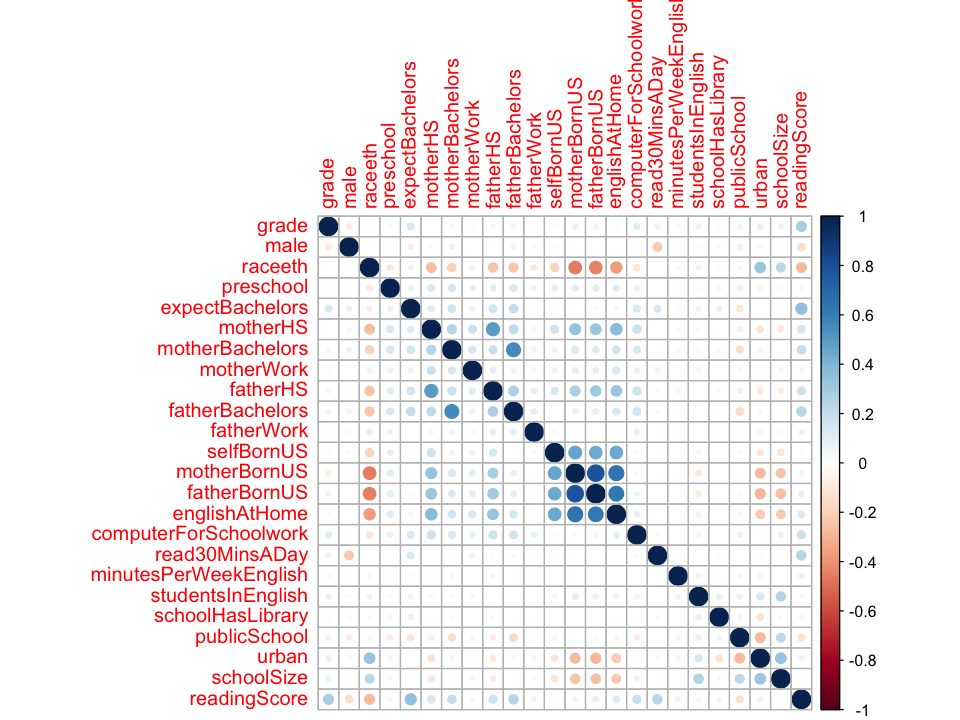

In [26]:
train_for_corr = train
train_for_corr$raceeth = as.numeric(train_for_corr$raceeth)
options(repr.plot.width=8, repr.plot.height=6)
corrplot(cor(train_for_corr, use="complete.obs"))

The predictors **motherBornUS** and **englishAtHome** are highly correlated with **fatherBornUS**. This makes sense; each variable speaks to the student's home life. We will drop **fatherBornUs** to improve our situation. While **motherBornUS** and **englshAtHome** are highly correlated, removing both parents, or one parent and the **englishAtHome** variable, seems excessive. 

In [27]:
train$fatherBornUS = NULL
test2$fatherBornUS = NULL

We are now ready to train our model on our new data set.

In [28]:
linReg2 = lm(readingScore ~ ., data=train)

In [29]:
summary(linReg2)


Call:
lm(formula = readingScore ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-281.881  -50.734    2.378   52.638  234.695 

Coefficients:
                                                Estimate Std. Error t value
(Intercept)                                    95.137297  26.880475   3.539
grade                                          34.182001   2.354939  14.515
male                                          -16.623924   2.643230  -6.289
raceethAmerican Indian/Alaska Native          -62.580753  12.859084  -4.867
raceethAsian                                    0.694547   7.589861   0.092
raceethBlack                                  -73.828377   4.198280 -17.585
raceethHispanic                               -41.557717   4.167915  -9.971
raceethMore than one race                     -23.181166   7.105865  -3.262
raceethNative Hawaiian/Other Pacific Islander -18.231584  14.178447  -1.286
preschool                                      -3.643231   2.910999  

By using MICE and removing one multicollinear feature, we improved our in-sample $R^{2}$ by ~ $11.3\%$ and Adjusted-$R^{2}$ by ~ $12.5\%$. We'll now evaluate the model in an out-of-sample environment.

In [30]:
linReg2_predTest = predict(linReg2, newdata=test2)

Looking at the out-of-sample RMSE, our revised model compares very favorably to the baseline. Moreover, it increased by only .02% relative to our initial model. This seems like a small price to pay for the substantial increases in explained variance suggested by the model's $R^{2}$ values discussed above.

In [31]:
rmse_test_lr2 = sqrt(mean(((test2$readingScore - linReg2_predTest)^2)))
rmse_baseline_test_lr2 = round(sqrt(mean((test2$readingScore - mean(test2$readingScore))^2)),4)
cat(paste("The out-of-sample RMSE of our model is", round(rmse_test_lr2,2), "versus an out-of-sample baseline RMSE of", round(rmse_baseline_test_lr2,2),"."))

The out-of-sample RMSE of our model is 77.78 versus an out-of-sample baseline RMSE of 88.76 .

In [32]:
sse = sum((test2$readingScore - linReg2_predTest)^2)
sst = sum((test2$readingScore - mean(train2$readingScore))^2)
r_square = (1-sse/sst)
cat(paste('The out-of-sample R-Squared for our model is ', round(r_square, 4), ".", sep=""))

The out-of-sample R-Squared for our model is 0.2325.

Predictably, the out-of-sample $R^{2}$ declined (-11%) due to the elimination of a feature.

We'll now see what our results look like when we eliminate superfluous predictors from our model and keep only those at the .001 significance level. 

In [33]:
linReg3 = lm(readingScore ~ grade + male + raceeth + expectBachelors + fatherBachelors + englishAtHome + computerForSchoolwork + read30MinsADay + publicSchool + schoolSize, data=train)

In [34]:
summary(linReg3)


Call:
lm(formula = readingScore ~ grade + male + raceeth + expectBachelors + 
    fatherBachelors + englishAtHome + computerForSchoolwork + 
    read30MinsADay + publicSchool + schoolSize, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-276.693  -50.648    2.094   51.824  240.573 

Coefficients:
                                                Estimate Std. Error t value
(Intercept)                                   103.636395  25.031552   4.140
grade                                          34.334824   2.353995  14.586
male                                          -15.894394   2.640530  -6.019
raceethAmerican Indian/Alaska Native          -63.498263  12.869731  -4.934
raceethAsian                                    3.990997   6.943201   0.575
raceethBlack                                  -76.107389   4.069847 -18.700
raceethHispanic                               -43.464673   3.781053 -11.495
raceethMore than one race                     -22.986659   7.103202  

The above results are interesting. Counting **raceeth** as a single variable, we went from a model trained on 23 predictors to one that relies on only 10. Removing predictors always influences both $R^{2}$ metrics, and our in-sample $R^{2}$s declined by approximately $1\%$. We believe this is a vanishingly small cost for parsimony.

In [35]:
linReg3_pred = predict(linReg3)

In [36]:
linReg3_predTest = predict(linReg3, newdata=test2)

Our out-of-sample RMSE calculation presented below indicates the revised model still compares favorably to our baseline forecast. Moreover, its RMSE increased by a mere .016% relative to our original model and declined fractionally relative to our second model. We believe this is strong evidence that the revised model remains competitive, even when tested on unseen data.

In [37]:
rmse_test_lr3 = sqrt(mean(((test2$readingScore - linReg3_predTest)^2)))
rmse_baseline_test_lr3 = round(sqrt(mean((test2$readingScore - mean(test2$readingScore))^2)),4)
cat(paste("The out-of-sample RMSE of our model is ", round(rmse_test_lr3,2), " versus an out-of-sample baseline RMSE of ", round(rmse_baseline_test_lr3,2),".", sep=""))

The out-of-sample RMSE of our model is 77.51 versus an out-of-sample baseline RMSE of 88.76.

In [38]:
sse = sum((test2$readingScore - linReg3_predTest)^2)
sst = sum((test2$readingScore - mean(test2$readingScore))^2)
r_square = (1-sse/sst)
cat(paste('The out-of-sample R-Squared for our model is ', round(r_square, 4), ".", sep=""))

The out-of-sample R-Squared for our model is 0.2373.

While the gains relative to our second model are not huge, they do exist. We have decreased our out-of-sample RMSE, while our $R^{2}$ has remained effectively unchanged.

To summarize, our "everything-but-the-kitchen-sink" model certainly has predictive merit. We attempted to build upon this success in two stages. First, we replaced missing data using Multiple Imputation by Chained Equations (MICE) and struck multicollinear features from our dataset (threshold >= .70).  Our in-sample statistics improved, though our out-of-sample $R^{2}$ declined due to the removal of a feature and RMSE increased fractionally. Second, we removed statistically insignificant variables from the dataset. Our RMSE declined (i.e., improved) fractionally, while our out-of-sample $R^{2}$ remained largely unchanged.